## Plano de Carreira na Área de Tecnologia baseado na Compensação financeira Anual

O objetivo desse projeto é analisar a partir de variáveis(features), como Raça, Nível de formação, Localidade de moradia, Cargo na empresa e qual empresa de desejo de trabalho, qual será a Compensação financeira anual, que será o Target a ser descoberto. Foi escolhido a Compensação financeira anual, pois é a váriavel que mede financeiramente o contexto que abrange tanto o Sálario Base quanto os Bônus, que são as outras duas váriaveis que dizem a esse respeito. Ao final, o obejtivo também é que o usuário consiga traçar um plano de carreira, modificando as variáveis e vendo quanto é a compensação anual que cada caminho oferece, assim ele terá uma maior noção de ônus e bônus de cada escolha.
Retiramos nossa base de dados: [Base de Dados](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries)

<div id="regress"></div>

In [9]:
#importando varáveis
import scipy.stats as stats
from scipy.stats import t, norm, probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, ceil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn import *

%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

## Reconhecendo a Base de Dados


In [10]:
dados = pd.read_csv('Levels_Fyi_Salary_Data.csv')

In [11]:
#definindo as variáveis e reconhecendo a base de dados escolhida
dados.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [12]:
dados.loc[0,:]

timestamp                  6/7/2017 11:33:27
company                               Oracle
level                                     L3
title                        Product Manager
totalyearlycompensation               127000
location                    Redwood City, CA
yearsofexperience                        1.5
yearsatcompany                           1.5
tag                                      NaN
basesalary                          107000.0
stockgrantvalue                      20000.0
bonus                                10000.0
gender                                   NaN
otherdetails                             NaN
cityid                                  7392
dmaid                                  807.0
rowNumber                                  1
Masters_Degree                             0
Bachelors_Degree                           0
Doctorate_Degree                           0
Highschool                                 0
Some_College                               0
Race_Asian

In [13]:
dados.dtypes 

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

**Dicionário de dados:**


Variável | Descrição
:---:|---:
timestamp | Quando o dado foi adquirido
company | Empresa
level | Nível da observação 
title | Profissão
totalyearlycompensation | Renda anual (salário + bônus)
location | Local da região de trabalho
yearsofexperience | Anos de experiência de trabalho
yearsatcompany | Anos de experiência de trabalho na empresa atual
tag | 
cityid | ID da cidade
basesalary | Base salarial
stockgrantvalue | PRL-Participação nos Lucros e Resultados
bonus |Bônus
gender| Gênero
Masters_Degree| Mestrado
Bachelors_Degree| Bacharelado
Doctorate_Degree| Doutorado 
Highschool| Ensino médio
Some_College| Faculdade
Race_Asian| Pessoa asiática
Race_White| Pessoa branca
Race_Two_Or_More| Faz parte de dois grupos étnicos ou mais
Race_Black| Pessoa negra
Race_Hispanic| Pessoa hispânica
Education | Nivél de formação

## Análise dos Features e Features Desconsiderados:

</ol> </li>
<li> Education: Compreende-se que as Features binárias "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool" e "Some_College" tem o mesmo signficado da Feature Education, porém já estão no formato binário, o que facilita no uso da prediçáo
<ol>
    
</ol> </li>
<li> Basesalary, Stockgrantvalue e Bonus: Como o objetivo do Projeto é prever a Compensação Financeira anual, a partir de Features que compõe um plano de carreira de uma pessoa que trabalha na área de tecnologia nos Estados Unidos, não faz sentido usar Features com viéses financeiros, já que essas tem relação óbvia e direta com o Target e o usuário do modelo de predição do projeto não teria esses dados, e sim seu histórico, suas características e suas vontades e possibilidades dentro da carreira. 
<ol>
    
</ol> </li>
<li> CityId: Compreende-se que esse Feature traz um valor para análise similar com o Feature Location, e foi escolhido manter o Feature Location, já que tem menos rótulos dentro do Feature e será mais fácil de encaixar dentro dos modelos preditivos.
<ol>
    
</ol> </li>
<li> Tag e TimeStamp: Features usadas apenas para a organização da coleta de dados 
<ol>
    
</ol> </li>
<li> Other Details: Tem informações contidas em outras Features, porém de uma forma menos organizada
<ol>

## Limpeza dos dataframes 

In [14]:

dados= dados.drop('gender',axis = 1)
dados= dados.drop('Education',axis=1)
dados=dados.drop('basesalary',axis=1)
dados=dados.drop('stockgrantvalue',axis=1)
dados=dados.drop('bonus',axis=1)
dados=dados.drop('cityid',axis=1)
dados=dados.drop('tag',axis=1)
dados=dados.drop('timestamp',axis=1)
dados=dados.drop('otherdetails',axis = 1)
dados=dados.drop('rowNumber',axis = 1)
dados=dados.drop('Race',axis = 1)
dados=dados.drop('dmaid',axis = 1)

filtro = dados['level'] != ''
dados = dados.loc[filtro,:]

In [15]:
dados

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,0,0,0,0,0,0,0,0,0,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0,0,0,0,0,0,0,0,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,0,0,0,0,0,0,0,0,0,0
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,0,0,0,0,0,0,0,0,0,0
62639,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,0,0,0,0,0,0,0,0,0,0


## Analisando comportamento de cada Feature em relação ao Target

### Title : Cargo ocupado na Empresa

In [19]:
dados['title'].value_counts(normalize=True) #vendo qual porcentagem de cada profissão representa a amostra to

Software Engineer               0.658201
Product Manager                 0.074599
Software Engineering Manager    0.056975
Data Scientist                  0.041154
Hardware Engineer               0.035120
Product Designer                0.024201
Technical Program Manager       0.022046
Solution Architect              0.018470
Management Consultant           0.015581
Business Analyst                0.014128
Marketing                       0.011334
Mechanical Engineer             0.007822
Sales                           0.007359
Recruiter                       0.007200
Human Resources                 0.005811
Name: title, dtype: float64

Inglês | Português
:---:|---:
Software Engineer | Engenheiro de Software
Product Manager | Gerente de Produto
Software Engineering Manager | Gerente de Engenharia de Software
Data Scientist | Cientista de Dados
Hardware Engineer | Engenharia de Hardware
Product Designer | Designer de produção
Technical Program Manager | Gerente de técnico de programação
Solution Architect | Arquiteto de soluções
Management Consultant | Gerente de consulta
Business Analyst | Analista de negócios
Marketing | Marketing
Mechanical Engineer | Engenheiro mecânico
Sales |Vendas
Recruiter| Recrutador
Human Resources| Recursos Humanos

Para verificar o funcionamento do Target Compensação Anual Financeira segmentado por cargos dentro de uma empresa de tecnologia americana, foi decidido usar um gráfico do tipo `Box Plot`.

O `Box Plot` é um gráfico que permite vizualizar o resumo de 5 principais medidas, que são máximo, mínimo, primeiro quartil, mediana e terceiro quartil.
![BoxPlot](boxplot2.png)





* **Outliers** : Valores discrepantes que estão fora do intevralo interquartílico 
* **Mínimo** : É o mínimo definido por um limite baseado nos valores dos quartis, mas não é o mínimo global necessariamente, já que esse poderia ser um outlier
* **Máximo** : É o mínimo definido por um limite baseado nos valores dos quartis, mas não é o maxímo global necessariamente, já que esse poderia ser um outlier 
* **Primeiro Quartil** : Demarcação que distingue que 25% dos dados estão abaixo e 75% estão acima desse valor
* **Mediana ou Segundo Quartil** : Representado pela linnha mais ao centro do gráfico, divide 50% dos dados acima e 50% dos dados abaixo do valor
* **Terceiro Quartil** : Demarcação que distingue que 75% dos dados estão abaixo e 25% estão acima desse valor



[]

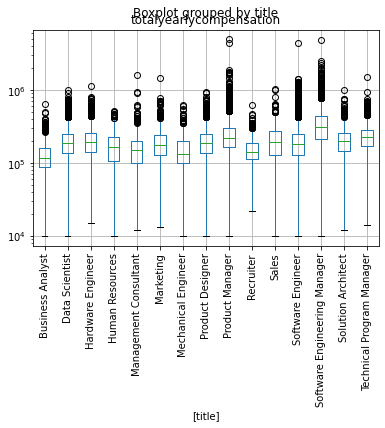

In [25]:
boxplot = dados.boxplot(column=['totalyearlycompensation'], by=['title'],rot=90)
boxplot.semilogy()

In [26]:
#dando valores para os dados mostrados no gráfico
dados.groupby(['title']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Business Analyst,885.0,129727.683616,67271.511823,10000.0,87000.0,116000.0,160000.0,650000.0
Data Scientist,2578.0,203656.710628,109504.643967,10000.0,135000.0,185000.0,250000.0,1000000.0
Hardware Engineer,2200.0,213655.000000,108318.822574,15000.0,140000.0,193500.0,260000.0,1150000.0
Human Resources,364.0,178711.538462,101163.325811,10000.0,104750.0,164500.0,230000.0,525000.0
Management Consultant,976.0,162795.081967,98473.607118,12000.0,100000.0,149000.0,200000.0,1600000.0
Marketing,710.0,198971.830986,115845.414218,13000.0,129250.0,175000.0,240000.0,1470000.0
Mechanical Engineer,490.0,158442.857143,87963.611411,10000.0,100000.0,133000.0,200000.0,615000.0
Product Designer,1516.0,207637.203166,109739.200170,10000.0,138000.0,187500.0,251000.0,950000.0
Product Manager,4673.0,257813.396105,182258.214578,10000.0,163000.0,220000.0,305000.0,4980000.0


O Box Plot acima consegue revelar algumas características de como a compensação financeira anual se comporta. Primeira característica é que todos os cargos apresentam muitos outliners, principalmente Product Manager, Software Engineering Manager e Software Engineer, que também são cargos que estão entre os 5 que tem as maiores médias de compensação financeira. Isso mostra que por exemplo para esses cargos, a média de compensação anual não tem um significado do comum na realidade nesse cargo, que é um ponto de interesse do usuário desse modelo de predição. Outro ponto interessante é que o cargo que tem a compensação mínima mais alta dentro dos limites calculados, é o Recrutador, mas esse ao mesmo tempo é o cargo em que a compensação tem o Intervalo Interquartílico mais baixo, ou seja a compensação anual varia pouco dentro desse cargo e é a profissão que tem a mediana e o máximo mais baixos. E um último ponto que vale a observação é que o Software Engineering Manager e o Human Resources são os cargos em que os intervalos interquartílicos são maiores, ou seja que as compensações financeira anuais mais variam.

### Nível de escolaridade: Masters_Degree, Bachelors_Degree, Doctorate_Degree e Highschool

In [35]:
masters_degree = dados['Masters_Degree'].value_counts(normalize=True) #vendo qual porcentagem de cada profissão representa a amostra total
bachelors_degree = dados['Bachelors_Degree'].value_counts(normalize=True)
doctorate_degree = dados['Doctorate_Degree'].value_counts(normalize=True)
highschool = dados['Highschool'].value_counts(normalize=True)

d = {'doctorate_degree': doctorate_degree,'masters_degree': masters_degree, 'bachelors_degree': bachelors_degree,  'highschool': highschool}
dfescol = pd.DataFrame(data=d)
dfescol

,doctorate_degree,masters_degree,bachelors_degree,highschool
0,0.971217,0.754302,0.798777,0.994892
1,0.028783,0.245698,0.201223,0.005108


Relembrando que as Features de escolaridade são dadas em binário, o `0` representa o negativo e o `1` representa o positivo. Com a tabela acima das porcentagens amostrais de cada binário das features `Masters_Degree, Bachelors_Degree, Doctorate_Degree e Highschool`, é possível ver que pouca parte dos empregados em empresas de tecnologia nos Estados Unidos chega a concluir o doutorado. Mas, a maior parte dos trabalhadores conclui conclui o mestrado. Lembrando que essas Features representam o máximo nível de escolaridade dos trabalhadores.

In [48]:
dados.groupby(['Doctorate_Degree']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Doctorate_Degree,,,,,,,,
0,60839.0,213991.173524,136884.508786,10000.0,134000.0,186000.0,260000.0,4980000.0
1,1803.0,294220.188575,153218.061809,22000.0,194000.0,254000.0,353000.0,1250000.0


Analisando as medianas, para os outliers não interfirirem tanto na análise como fariam nas médias, quem faz doutorado tem uma mediana de compensação anual cerca 26,77% maior que de quem não faz. E no máximo observa-se um outlier já que a máxima compensação anual de quem não fez doutorado é praticamente 400% maior do que de quem fez, e isso não se afirma nas outra medidas.

In [49]:
dados.groupby(['Masters_Degree']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Masters_Degree,,,,,,,,
0,47251.0,214857.167171,137892.754930,10000.0,131000.0,185000.0,262000.0,4950000.0
1,15391.0,220731.076603,138376.175034,10000.0,143000.0,195000.0,267000.0,4980000.0


Em nível de mestrado é observado um comportamento de que os que não fizeram tem uma compensação anual financeira muito parecida de quem concluiu o mestrado. A média da compensação anual de quem faz mestrado é 2,7% mais alta de que quem não faz e a mediana de quem faz mestrado é 5% mais alta de que quem não faz, enquanto esse valor no Dourado era de 3%.

In [50]:
dados.groupby(['Bachelors_Degree']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Bachelors_Degree,,,,,,,,
0,50037.0,225990.307293,141003.275592,10000.0,144000.0,196000.0,275000.0,4980000.0
1,12605.0,177835.065450,117953.046354,10000.0,100000.0,156000.0,223000.0,1733000.0


Para quem faz unão faz uma formação na faculdade ou faz mestrado e doutorado, a média da compensação anual é 21,308% maior de que quem faz apenas faculdade. Os quartis de 25% e 75% também mostram esse comportamento.

In [51]:
dados.groupby(['Highschool']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Highschool,,,,,,,,
0,62322.0,216447.065338,138100.456775,10000.0,135000.0,188000.0,264000.0,4980000.0
1,320.0,187731.250000,121207.623723,15000.0,105750.0,162500.0,243250.0,875000.0


### Empresas

Devido a grande quantidade de informações contida na base de dados, foram filtradas as dez empresas com maior presença em nossa base de dados. Para isso, utilizamos a função value_counts e concluímos que as dez empresas com mais informações em nossa base são:
- Amazon
- Microsoft
- Google
- Facebook 
- Apple
- Oracle
- Salesforce
- Intel
- Cisco
- IBM

Dessa forma, o novo dataframe utilizado contém agora apenas dados referentes as 10 empresas mencionadas acima.

In [69]:
companys = dados.company.value_counts(normalize=True)
companys

Amazon                      0.129732
Microsoft                   0.083273
Google                      0.069128
Facebook                    0.047735
Apple                       0.032377
                              ...   
Samsung research America    0.000016
Bny Mellon                  0.000016
yelp                        0.000016
Bloomberg lp                0.000016
tableau software            0.000016
Name: company, Length: 1631, dtype: float64

In [70]:
companys = dados.company.value_counts(normalize=True)
companys.head(10)
top10_companies = ['Amazon',' Microsoft','Google','Facebook','Apple','Oracle','Salesforce','Intel' ,'Cisco','IBM']

filtro = [t in ['Amazon',' Microsoft','Google','Facebook','Apple','Oracle','Salesforce','Intel' ,'Cisco','IBM'] for t in list(dados['company'])]
dados = dados.loc[filtro,:]
dados

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,0,0,0,0,0,0,0,0,0,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,0,0,0,0,0,0,0,0,0,0
10,Salesforce,9,Software Engineering Manager,450000,"San Francisco, CA",16.0,3.0,0,0,0,0,0,0,0,0,0,0
14,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62631,Facebook,E5,Software Engineering Manager,421000,"Menlo Park, CA",13.0,3.0,0,0,0,0,0,0,0,0,0,0
62633,Salesforce,SMTS,Software Engineer,230000,"Bellevue, WA",5.0,1.0,0,0,0,0,0,0,0,0,0,0
62634,Amazon,L5,Software Engineer,213000,"Seattle, WA",6.0,4.0,0,0,0,0,0,0,0,0,0,0
62637,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,0,0,0,0,0,0,0,0,0,0


[]

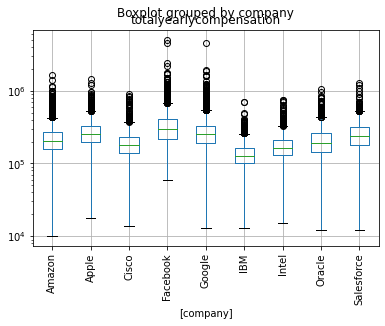

In [71]:
boxplot = dados.boxplot(column=['totalyearlycompensation'], by=['company'],rot=90)
boxplot.semilogy()

No gráfico acima, foram plotados os valores de renda anual em todas as 10 empresas selecionadas.

### Local

Da mesma forma que para as empresas acima, devido a grande quantidade de informações contida na base de dados, foram filtradas os dez locais com maior presença em nossa base de dados. Para isso, utilizamos a função value_counts e concluímos que os 10 locais com mais informações em nossa base são:

- Seattle, WA
- San Francisco, CA
- New York, NY
- Redmond, WA
- Mountain View, CA
- Sunnyvale, CA
- San Jose, CA
- Austin, TX
- Menlo Park, CA
- Cupertino, CA

O novo dataframe utilizado contém agora apenas dados referentes aos 10 locais mencionados acima.

In [73]:
location = dados.location.value_counts(normalize=True)
location.head(10)


filtro = [t in ['Seattle, WA',' San Francisco, CA','New York, NY','Redmond, WA','Mountain View, CA','Sunnyvale, CA','San Jose, CA','Austin, TX' ,'Menlo Park, CA','Cupertino, CA'] for t in list(dados['location'])]
dados = dados.loc[filtro,:]
dados

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,0,0,0,0,0,0,0,0,0,0
14,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,0,0,0,0,0,0,0,0,0,0
15,Amazon,L5,Software Engineer,218000,"Seattle, WA",10.0,0.0,0,0,0,0,0,0,0,0,0,0
16,Facebook,E3,Software Engineer,168000,"Menlo Park, CA",1.0,1.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62618,Cisco,E12,Product Manager,278000,"San Jose, CA",22.0,6.0,0,0,0,0,0,0,0,0,0,0
62621,Google,L4,Software Engineer,215000,"Mountain View, CA",2.0,2.0,0,0,0,0,0,0,0,0,0,0
62631,Facebook,E5,Software Engineering Manager,421000,"Menlo Park, CA",13.0,3.0,0,0,0,0,0,0,0,0,0,0
62634,Amazon,L5,Software Engineer,213000,"Seattle, WA",6.0,4.0,0,0,0,0,0,0,0,0,0,0


In [74]:
location = dados.location.value_counts(normalize=True)
location.head(10)

Seattle, WA          0.424952
Cupertino, CA        0.104238
Mountain View, CA    0.101571
Menlo Park, CA       0.101126
New York, NY         0.093569
Sunnyvale, CA        0.077567
San Jose, CA         0.050081
Austin, TX           0.043488
Redmond, WA          0.003408
Name: location, dtype: float64

[]

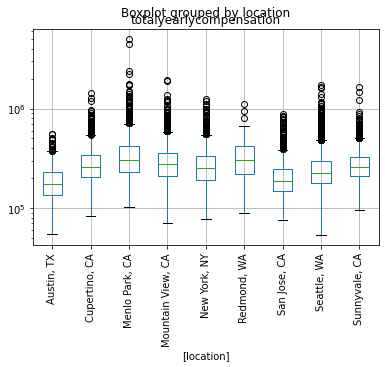

In [75]:
boxplot = dados.boxplot(column=['totalyearlycompensation'], by=['location'],rot=90)
boxplot.semilogy()

No gráfico acima, foram plotados os valores de renda anual em todas as 10 localizações selecionadas.

### Level 

In [77]:
levels = ['L5','L4','L6','L3','ICT4','ICT3','E5','L7','E4','SDE I']

In [78]:
levels = dados.level.value_counts(ascending = False)
levels.head(10)

filtro = [t in ['L5','L4','L6','L3','ICT4','ICT3','E5','L7','E4','SDE I'] for t in list(dados['level'])]
dados = dados.loc[filtro,:]
dados

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,0,0,0,0,0,0,0,0,0,0
14,Amazon,L6,Software Engineering Manager,287000,"Seattle, WA",12.0,1.0,0,0,0,0,0,0,0,0,0,0
15,Amazon,L5,Software Engineer,218000,"Seattle, WA",10.0,0.0,0,0,0,0,0,0,0,0,0,0
22,Amazon,L6,Software Engineer,300000,"Seattle, WA",12.0,12.0,0,0,0,0,0,0,0,0,0,0
23,Amazon,L7,Software Engineer,430000,"Seattle, WA",12.0,12.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62615,Amazon,L5,Product Manager,173000,"Seattle, WA",10.0,1.0,0,0,0,0,0,0,0,0,0,0
62616,Amazon,L6,Product Manager,181000,"Seattle, WA",9.0,2.0,0,0,0,0,0,0,0,0,0,0
62621,Google,L4,Software Engineer,215000,"Mountain View, CA",2.0,2.0,0,0,0,0,0,0,0,0,0,0
62631,Facebook,E5,Software Engineering Manager,421000,"Menlo Park, CA",13.0,3.0,0,0,0,0,0,0,0,0,0,0


[]

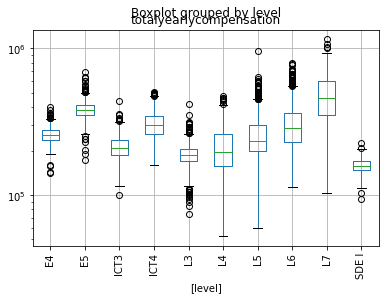

In [79]:
boxplot = dados.boxplot(column=['totalyearlycompensation'], by=['level'],rot=90)
boxplot.semilogy()

### Raça 

In [85]:
dados.groupby(['Race_Asian']).describe()['totalyearlycompensation']


,count,mean,std,min,25%,50%,75%,max
Race_Asian,,,,,,,,
0,7437.0,265264.454753,108558.376862,53000.0,190000.0,240000.0,313000.0,1150000.0
1,1725.0,260358.840580,99364.683949,65000.0,193000.0,240000.0,304000.0,1026000.0


-Analisando os dados, podemos ver que há um número considerável de asiáticos dentro dessa área de STEM, entretanto apesar de um numero elevado de pessoas, a média salarial ainda é menor se comparado à etnias brancas. Porém o maior salário de nossos dados é de um asiático.

In [80]:
dados.groupby(['Race_Black']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Race_Black,,,,,,,,
0,9079.0,264605.545765,106891.055132,53000.0,191000.0,240000.0,310500.0,1150000.0
1,83.0,235385.542169,104490.731451,69000.0,165000.0,201000.0,267500.0,595000.0


Ao analisarmos esses dados, podemos perceber o baixo número de negros dentro da área de STEM, além de que a média salarial é a mais baixa de todas as outras.


In [81]:
dados.groupby(['Race_White']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Race_White,,,,,,,,
0,8307.0,263489.316239,106259.807334,53000.0,190000.0,240000.0,310000.0,1150000.0
1,855.0,272614.035088,112659.985808,75000.0,192000.0,250000.0,333500.0,800000.0


Ao analisarmos esses dados, podemos perceber que os brancos possuem a média salarial mais alta de todas, apesar do máximo ser bem abaixo do que o maior salário de todos, podendo concluir que há uma mediana salarial boa entre essa etnia.

In [83]:
dados.groupby(['Race_Hispanic']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Race_Hispanic,,,,,,,,
0,9001.0,264489.473392,107111.695629,53000.0,190000.0,240000.0,310000.0,1150000.0
1,161.0,256031.055901,94222.305106,104000.0,190000.0,231000.0,306000.0,640000.0


Os hispânicos juntamente com os negros, possuem uma média salarial muito baixa, além de que o máximo alcançado, não passa de 1 milhão de US$, como visto em todas as outras etnias.

In [84]:
dados.groupby(['Race_Two_Or_More']).describe()['totalyearlycompensation']

,count,mean,std,min,25%,50%,75%,max
Race_Two_Or_More,,,,,,,,
0,9059.0,264478.833205,107006.622486,53000.0,190000.0,240000.0,310000.0,1150000.0
1,103.0,252203.883495,96750.372064,105000.0,185500.0,233000.0,305000.0,700000.0


A etnia mista, apesar de ter poucos indivíduos, sua média salarial é a segunda maior, podendo ser por conta de uma mediana alta.

## Transformando variáveis qualitativas em quantitativas 

Para conseguir utilizar os modelos de regressão linear e de árvore de regressão levando em conta as variáveis qualitativas, que pelas análises influenciam na compensação anual financeira. Para isso é necessário pegar cada rótulo das Features analisadas e transformar em uma coluna binária, para isso a função get_dummies é utilizada.

In [52]:
df_bin = pd.get_dummies(dados, columns = ['company', 'level', 'title',
       'location'])
df_bin

,totalyearlycompensation,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,...,"location_Yeovil, EN, United Kingdom","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zaragoza, AR, Spain","location_Zug, ZG, Switzerland","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
0,127000,1.5,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100000,5.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,310000,8.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,372000,7.0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,157000,5.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,327000,10.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62638,237000,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62639,220000,14.0,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62640,280000,8.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
colunas= list(df_bin.columns) #todas as colunas levando em conta os rótulos das Features analisadas
colunas

['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'company_10x Genomics',
 'company_23andMe',
 'company_2U',
 'company_3M',
 'company_3m',
 'company_7-Eleven',
 'company_7-eleven',
 'company_8x8',
 'company_ABB',
 'company_ADP',
 'company_AIG',
 'company_AMAZON',
 'company_AMD',
 'company_AMazon',
 'company_ANSYS',
 'company_APPLE',
 'company_ARM',
 'company_ARUBA',
 'company_ASML',
 'company_ASUS',
 'company_AT Kearney',
 'company_AT&T',
 'company_AWS',
 'company_Abbott',
 'company_Accenture',
 'company_Acorns',
 'company_Acquia',
 'company_ActionIQ',
 'company_ActiveCampaign',
 'company_Activecampaign',
 'company_Activision',
 'company_Addepar',
 'company_Adevinta',
 'company_Adidas',
 'company_Adobe',
 'company_Adyen',
 'company_Aetna',
 'company_Affirm',
 'company_Afterpay',
 'company_Ago

## Separando planilhas de treinamento e teste

Para o desenvolvimento do projeto, tivemos que utilizar a base de dados selecionada e dividi-lá em dois DataFrames: Train e Test.

Para o desenvolvimento do projeto, tivemos que utilizar a base de dados selecionada e dividi-lá em dois DataFrames: Train e Test. Primeiramente, os dados contidos na planilha Train foram usados para o treinamento do modelo, no qual seria possível prever uma variável Target a partir de diferentes modelos de regressão. Já a planilha Test foi utilizada para validar o modelo desenvolvido durante o projeto.

In [55]:
features_columns = colunas
X=df_bin[features_columns] 
Y=df_bin.totalyearlycompensation
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3, random_state=1)

x_train 

,totalyearlycompensation,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,...,"location_Yeovil, EN, United Kingdom","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zaragoza, AR, Spain","location_Zug, ZG, Switzerland","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
60170,230000,8.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15396,208000,20.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,165000,7.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50325,376000,5.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
833,115000,4.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32511,40000,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,280000,9.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12172,197000,3.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33003,156000,2.0,2.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#criar uma base de dados de treinamento com a Target e Features juntas
totalyearlycompensationdata = pd.DataFrame(y_train)
lista = []
for i in totalyearlycompensationdata['totalyearlycompensation']:
    lista.append(i)
df_train = x_train
df_train['totalyearlycompensation']=lista

C:\Users\rabra\AppData\Local\Temp/ipykernel_19408/3299139480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['totalyearlycompensation']=lista


## Modelo de regressão linear simples via `statsmodels.OLS`

Na regressão linear simples, duas variáveis são utilizadas para prever comportamentos futuros. Tal previsão pode ser alcançada através de um estudo que envolve a equação da reta de regressão, concebida através das variáveis critério (y, dependente ou de resposta) e a independente (x, também conhecida como prognóstico)

𝑦𝑖=𝛽0+𝛽1𝑥𝑖+𝜀𝑖
 
Onde:

𝛽𝑖  são os coeficientes do modelo de regressão;
𝜀𝑖  representa os erros aleatórios. O erro aleatório tem média zero e variância (desconhecida)  𝜎2 . Além disso, esses erros aleatórios correspondentes as diferentes observações são também considerados variáveis aleatórias não correlacionadas.

𝛽̂ 0=𝑦¯−𝛽̂ 1𝑥¯
 
𝛽̂ 1=𝑆𝑋𝑌𝑆𝑋𝑋=∑𝑛𝑖=1(𝑥𝑖−𝑥¯)(𝑦𝑖−𝑦¯)∑𝑛𝑖=1(𝑥𝑖−𝑥¯)2

Suposições do modelo
Para podermos aplicar o modelo é necessário fazermos algumas suposições:

Os erros têm distribuição normal com média 0 e variância constante, ou seja,  𝜀𝑖∼𝑁(0,𝜎2) .
Os erros são independentes entre si, ou seja,  𝐶𝑜𝑟𝑟(𝜀𝑖,𝜀𝑗)=0 , para qualquer  𝑖≠𝑗 .
O modelo é linear nos parâmetros.
Homocedasticidade:  𝑉𝑎𝑟(𝜀𝑖)=𝜎2  para qualquer  𝑖=1,…,𝑛 .

In [45]:
df_train.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,Masters_Degree,Bachelors_Degree,...,title_Technical Program Manager,"location_Austin, TX","location_Cupertino, CA","location_Menlo Park, CA","location_Mountain View, CA","location_New York, NY","location_Redmond, WA","location_San Jose, CA","location_Seattle, WA","location_Sunnyvale, CA"
totalyearlycompensation,1.000000,0.497782,0.237274,0.772017,0.779507,0.419458,-0.149384,0.040410,0.012993,-0.065523,...,-0.016320,-0.120468,0.010438,0.215578,0.074787,-0.001780,0.034348,-0.087026,-0.101281,0.004017
yearsofexperience,0.497782,1.000000,0.459042,0.562724,0.476404,0.220401,-0.002905,0.011826,0.034143,-0.047939,...,0.122188,0.012437,-0.002161,-0.009106,-0.011191,-0.017698,0.029101,0.051954,-0.004292,-0.005768
yearsatcompany,0.237274,0.459042,1.000000,0.247883,0.281875,-0.032313,-0.022615,0.037061,0.012040,0.007678,...,0.018898,0.018289,0.038254,-0.111525,0.034668,-0.047709,-0.032293,0.169289,-0.005557,-0.037950
basesalary,0.772017,0.562724,0.247883,1.000000,0.644990,0.364105,-0.272023,-0.005309,0.040046,-0.093341,...,0.013699,-0.132343,0.085786,0.225156,0.101836,0.043411,0.045317,-0.032217,-0.233731,0.031861
stockgrantvalue,0.779507,0.476404,0.281875,0.644990,1.000000,0.184631,-0.076364,0.065996,0.007849,-0.051825,...,-0.025821,-0.124555,0.001237,0.175467,0.047461,-0.022345,0.032210,-0.120571,-0.020849,-0.003742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"location_New York, NY",-0.001780,-0.017698,-0.047709,0.043411,-0.022345,0.037866,0.107400,-0.922050,-0.043718,0.073548,...,-0.004181,-0.070763,-0.113026,-0.110140,-0.108031,1.000000,-0.019921,-0.074224,-0.274067,-0.094712
"location_Redmond, WA",0.034348,0.029101,-0.032293,0.045317,0.032210,0.027435,0.061556,0.027947,0.016760,-0.005485,...,-0.011615,-0.013382,-0.021374,-0.020828,-0.020429,-0.019921,1.000000,-0.014036,-0.051827,-0.017910
"location_San Jose, CA",-0.087026,0.051954,0.169289,-0.032217,-0.120571,-0.006671,-0.241095,0.075683,0.054040,-0.024748,...,-0.031819,-0.049859,-0.079638,-0.077604,-0.076118,-0.074224,-0.014036,1.000000,-0.193106,-0.066733
"location_Seattle, WA",-0.101281,-0.004292,-0.005557,-0.233731,-0.020849,-0.128926,0.849413,0.384486,0.010937,0.000315,...,0.003110,-0.184101,-0.294057,-0.286548,-0.281062,-0.274067,-0.051827,-0.193106,1.000000,-0.246409


## Years of experience x Total  Yearly Compensation
A nossa primeira tentativa de fazermos uma regressão linear, utilizando apenas features quantitativas, porém tivemos que desconsiderar as colunas *basesalary, bonus, stockgrantvalue*, pois com elas poderíamos poder prever facilmente o salário total, e não é isso que queremos né? e a coluna *yearsatcompany* possuía um alpha > 0.1, logo desconsideramos ela. Além disso, plotamos um *probplot* para vermos o comportamento da reta e sua normalidade, por conta disso conseguimos assumir que nosso modelo não respeita uma distribuição normal, pois há uma destoação na reta com os resíduos. Ainda mais, pela função Durbin-Watson, podemos ver que há uma boa correlação, porque o valor descrito está entre 1.5 e 2.5.

In [46]:
x_dados = df_train['yearsofexperience'] # Definindo anos de experiência como explicativa
y_dados = df_train['totalyearlycompensation']    # Definindo yearly compensation como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

In [47]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.248
Model:                                 OLS   Adj. R-squared:                  0.248
Method:                      Least Squares   F-statistic:                     2896.
Date:                     Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                             12:06:11   Log-Likelihood:            -1.1679e+05
No. Observations:                     8793   AIC:                         2.336e+05
Df Residuals:                         8791   BIC:                         2.336e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.805e+05   2395.698     75.356      0.000    1.76e+05    1.85e+05
yearsofexperience  1.373e+04    255.145     53.813      0.000    1.32e+04    1.42e+04
==============================================================================
Omnibus:                    13198.878   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17624997.907
Skew:                           8.783   Prob(JB):                         0.00
Kurtosis:                     221.627   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
beta0 = results.params['const']
beta1 = results.params['yearsofexperience']

print(f'Estimativa de beta0 (coeficente linear):  {beta0}')
print(f'Estimativa de beta1 (coeficente angular): {beta1}')

Estimativa de beta0 (coeficente linear):  180530.6902336587
Estimativa de beta1 (coeficente angular): 13730.145676105263


In [49]:
results.resid

29046    -56721.127262
15737    -71482.875375
54471    -72911.564290
34846    -21990.981586
4087    -120213.021051
             ...      
52686     99009.018414
4166     -73292.438347
22574   -199022.584023
60333    -21260.835910
1425      29278.872738
Length: 8793, dtype: float64

### Gerando o probplot dos resíduos para verificar a sua normalidade.

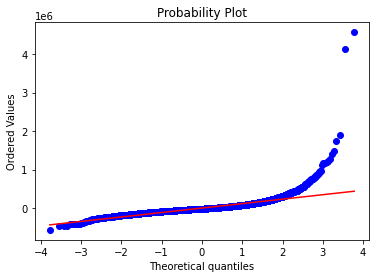

In [50]:
probplot(results.resid, plot=plt)
plt.show()

## Years at company x Total  Yearly Compensation

In [51]:
x_dados = df_train['yearsatcompany'] # Definindo anos na empresa como explicativa
y_dados = df_train['totalyearlycompensation']    # Definindo yearly compensation como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

In [52]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.056
Model:                                 OLS   Adj. R-squared:                  0.056
Method:                      Least Squares   F-statistic:                     524.5
Date:                     Tue, 07 Jun 2022   Prob (F-statistic):          8.68e-113
Time:                             12:06:18   Log-Likelihood:            -1.1779e+05
No. Observations:                     8793   AIC:                         2.356e+05
Df Residuals:                         8791   BIC:                         2.356e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.474e+05   2227.488    111.055      0.000    2.43e+05    2.52e+05
yearsatcompany  1.348e+04    588.499     22.901      0.000    1.23e+04    1.46e+04
==============================================================================
Omnibus:                    12047.400   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8971948.432
Skew:                           7.470   Prob(JB):                         0.00
Kurtosis:                     158.773   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
beta0 = results.params['const']
beta1 = results.params['yearsatcompany']

print(f'Estimativa de beta0 (coeficente linear):  {beta0}')
print(f'Estimativa de beta1 (coeficente angular): {beta1}')

Estimativa de beta0 (coeficente linear):  247372.92693136356
Estimativa de beta1 (coeficente angular): 13477.161947565537


In [54]:
results.resid

29046    -95850.088879
15737     54149.911121
54471    -84327.250826
34846    -74850.088879
4087      32627.073069
             ...      
52686     59627.073069
4166      24627.073069
22574   -208667.384459
60333    -87850.088879
1425      -9850.088879
Length: 8793, dtype: float64

### Gerando o probplot dos resíduos para verificar a sua normalidade.

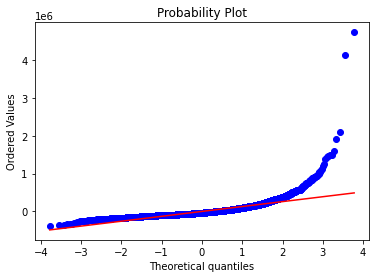

In [55]:
probplot(results.resid, plot=plt)
plt.show()

In [184]:
durbin_watson(results3.resid)

2.014218720155625

In [185]:
# Recupera os parâmetros calculados
beta0_hat = results3.params[0]  # const
beta1_hat = results3.params[1]  # yearsofexperience
beta2_hat = results3.params[2]  # yearsatcompany
#beta3_hat = results3.params[3] #Bachelors_Degree

In [186]:
# Define uma função que aplica aos parâmetros
def f(feature1, feature2):   #,feature3):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2 #+ beta3_hat*feature3

In [ ]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [188]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

NameError: name 'eixo_x' is not defined

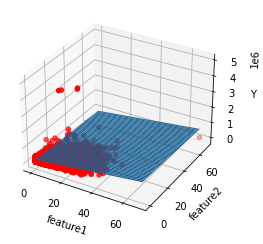

In [73]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

## Modelo de regressão linear múltipla

In [187]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 1000
feature1 = X3["yearsofexperience"]
feature2 = X3["yearsatcompany"]
# feature3 = X3["Bachelors_Degree"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

KeyError: 'yearsatcompany'

In [61]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [62]:
lista = list(df_train.columns)
lista

['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'company_10x Genomics',
 'company_23andMe',
 'company_2U',
 'company_3M',
 'company_3m',
 'company_7-Eleven',
 'company_7-eleven',
 'company_8x8',
 'company_ABB',
 'company_ADP',
 'company_AIG',
 'company_AMAZON',
 'company_AMD',
 'company_AMazon',
 'company_ANSYS',
 'company_APPLE',
 'company_ARM',
 'company_ARUBA',
 'company_ASML',
 'company_ASUS',
 'company_AT Kearney',
 'company_AT&T',
 'company_AWS',
 'company_Abbott',
 'company_Accenture',
 'company_Acorns',
 'company_Acquia',
 'company_ActionIQ',
 'company_ActiveCampaign',
 'company_Activecampaign',
 'company_Activision',
 'company_Addepar',
 'company_Adevinta',
 'company_Adidas',
 'company_Adobe',
 'company_Adyen',
 'company_Aetna',
 'company_Affirm',
 'company_Afterpay',
 'company_Ago

In [63]:
df_bin.columns

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White',
       ...
       'location_Yeovil, EN, United Kingdom', 'location_Yerevan, ER, Armenia',
       'location_York, PA', 'location_Yorktown Heights, NY',
       'location_Yulee, FL', 'location_Zapopan, JA, Mexico',
       'location_Zaragoza, AR, Spain', 'location_Zug, ZG, Switzerland',
       'location_Zurich, ZH, Switzerland',
       'location_hod hasharon, HM, Israel'],
      dtype='object', length=5632)

 ## Todas as features
  Aqui criamos uma variavel X3 que irá receber todas as features que foram consideradas no dataframe, menos a feature 'totalyearcompensation' que será o nosso Y. Para então colocar na função regress que foi criada anteriormente, para conseguirmos fazer o summary() e pegar diversos valores da nossas features, mais precisamente, o nosso p-valor, representado na coluna 'P > |t|', para então podermos começar a regressão linear, onde retiramos os valores de P, para cada valor sendo maior que alfa(0,01 ou 1%). Podemos ver que nesse  modelo, o valor de Durbin-Watson está entre 1.5 e 2.5, podendo afirmar que  há uma correlação boa em geral

In [64]:
# Obtém a regressão
X3 = df_train[[
 'yearsofexperience',
 'yearsatcompany',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'company_Amazon',
 'company_Apple',
 'company_Cisco',
 'company_Facebook',
 'company_Google',
 'company_IBM',
 'company_Intel',
 'company_Oracle',
 'company_Salesforce',
 'level_004',
 'level_006',
 'level_1',
 'level_10',
 'level_11',
 'level_12',
 'level_13',
 'level_2',
 'level_3',
 'level_4',
 'level_4`',
 'level_5',
 'level_6',
 'level_6.5',
 'level_60',
 'level_62',
 'level_7',
 'level_8',
 'level_84',
 'level_9',
 'level_Advisory',
 'level_Advisory Engineer',
 'level_Advisory Offering Manager',
 'level_Advisory Product Manager',
 'level_Advisory Software Engineer',
 'level_Am',
 'level_Associate Engineer',
 'level_Associate MTS',
 'level_Associate Member of Technical Staff',
 'level_Associate Offering Manager',
 'level_Associate Product Manager 1',
 'level_B10',
 'level_B8',
 'level_B9',
 'level_Band 10',
 'level_Band 6',
 'level_Band 7',
 'level_Band 8',
 'level_Band 8 - Advisory Software Engineer',
 'level_Band 8 backend engineer',
 'level_Band 9',
 'level_Band D',
 'level_Co-Op',
 'level_Consultant',
 'level_Consulting MTS',
 'level_Contractor',
 'level_D1',
 'level_D2',
 'level_Director',
 'level_Director 1',
 'level_Director QA M4',
 'level_Director product',
 'level_Distinguished Engineer',
 'level_E12',
 'level_E3',
 'level_E4',
 'level_E4 (Rotational Engineer)',
 'level_E5',
 'level_E6',
 'level_E7',
 'level_E8',
 'level_E9',
 'level_ECDP',
 'level_EM2',
 'level_Engineer',
 'level_Engineering Manager',
 'level_Engineering Resident',
 'level_G062',
 'level_G10',
 'level_G11',
 'level_G12',
 'level_G13',
 'level_G6',
 'level_G8',
 'level_Grade 10',
 'level_Grade 11',
 'level_Grade 12',
 'level_Grade 13',
 'level_Grade 4',
 'level_Grade 5',
 'level_Grade 6',
 'level_Grade 7',
 'level_Grade 8',
 'level_Grade 9',
 'level_IC-1',
 'level_IC-2',
 'level_IC-3',
 'level_IC-4',
 'level_IC-5',
 'level_IC-6',
 'level_IC1',
 'level_IC2',
 'level_IC3',
 'level_IC3 PM',
 'level_IC4',
 'level_IC5',
 'level_IC6',
 'level_IC7',
 'level_IC8',
 'level_ICT 2',
 'level_ICT 3',
 'level_ICT 4',
 'level_ICT-4',
 'level_ICT2',
 'level_ICT3',
 'level_ICT4',
 'level_ICT5',
 'level_ICT6',
 'level_IST1',
 'level_ITC3',
 'level_ITC4',
 'level_Ic2',
 'level_Ic3',
 'level_Ic4',
 'level_Ic5',
 'level_Ict 4',
 'level_Ict4',
 'level_Ict5',
 'level_Intern',
 'level_L 4',
 'level_L1',
 'level_L10',
 'level_L11',
 'level_L2',
 'level_L3',
 'level_L4',
 'level_L4 Product Manager',
 'level_L4 Project Manager',
 'level_L4 Software',
 'level_L4 Sourcer',
 'level_L4P',
 'level_L5',
 'level_L5 Marketing',
 'level_L5 Mexhanical Engineer',
 'level_L5 Product Growth Analyst',
 'level_L5 Product Manager',
 'level_L5 Program Manager',
 'level_L5 QAE',
 'level_L5 SDM',
 'level_L5 security',
 'level_L5`',
 'level_L6',
 'level_L6 (Staff)',
 'level_L6 Manager',
 'level_L6 PM',
 'level_L6 PMT-ES',
 'level_L6 Product Manager',
 'level_L6 QAM',
 'level_L6 SDM',
 'level_L6.5',
 'level_L7',
 'level_L7 Product Manager',
 'level_L7.5',
 'level_L8',
 'level_L8 Director',
 'level_L8 Director Product Management',
 'level_L9',
 'level_LC2',
 'level_LMTS',
 'level_Lead MTS',
 'level_Lead SWE',
 'level_Level 5',
 'level_Level 8',
 'level_M',
 'level_M0',
 'level_M1',
 'level_M2',
 'level_M3',
 'level_M4',
 'level_M5',
 'level_M6',
 'level_MGT1',
 'level_MTS',
 'level_Manager',
 'level_Manager (L6)',
 'level_Member of Technical Staff',
 'level_New Grad',
 'level_New Grad L3',
 'level_New grad',
 'level_PM 1',
 'level_PM 2',
 'level_PM 3',
 'level_PM1',
 'level_PM2 (L5)',
 'level_PM3',
 'level_PMTS',
 'level_Principal',
 'level_Principal Database Administrator',
 'level_Principal Designer',
 'level_Principal Eng',
 'level_Principal Engineer',
 'level_Principal MTS',
 'level_Principal Product Manager',
 'level_Principal SDE',
 'level_Product Manager',
 'level_Product Manager 1',
 'level_Product Manager 2',
 'level_Program Director',
 'level_Rotational Product Manager (RPM)',
 'level_Rotational Software Engineer',
 'level_SDE 2',
 'level_SDE 3',
 'level_SDE I',
 'level_SDE II',
 'level_SDE III',
 'level_SDE Newgrad',
 'level_SDE1',
 'level_SDE2',
 'level_SDEI',
 'level_SDEIII',
 'level_SMTS',
 'level_STSM',
 'level_SW Dev Eng Mgr 2',
 'level_SWE II',
 'level_SWE III',
 'level_Sde 2',
 'level_Sde2',
 'level_Senior',
 'level_Senior Director',
 'level_Senior Director, Product Management',
 'level_Senior Engineer',
 'level_Senior Engineering Manager',
 'level_Senior MTS',
 'level_Senior Manager',
 'level_Senior Manager PM',
 'level_Senior Offering Manager',
 'level_Senior Principal Eng',
 'level_Senior Product Manager',
 'level_Senior Program Manager',
 'level_Senior SDE',
 'level_Senior SDM',
 'level_Senior SWE',
 'level_Senior Software Engineer',
 'level_Senior Staff SWE',
 'level_Senior Technical Leader',
 'level_Senior Technical Staff Member',
 'level_Senior engineer',
 'level_Senior technical lead',
 'level_Software Dev Manager',
 'level_Software Engineer',
 'level_Software Engineer - Band 7',
 'level_Software Engineer 1',
 'level_Software Engineer 10',
 'level_Software Engineer 2',
 'level_Software Engineer III',
 'level_Software Engineer IV',
 'level_Software Integrity Eng 4',
 'level_Sr',
 'level_Sr Product Manager',
 'level_Sr Software Engineer Manager',
 'level_Staff',
 'level_Staff Engineer',
 'level_Staff SWE',
 'level_Support 3',
 'level_T3',
 'level_T4',
 'level_T5',
 'level_T6',
 'level_T7',
 'level_TL',
 'level_Technical Director',
 'level_Technical Leader 1',
 'level_Technical Leader 2',
 'level_Technical Leader I',
 'level_UX Designer II',
 'level_UX Designer III',
 'level_Unkown',
 'level_VP',
 'level_band 6',
 'level_e3',
 'level_e5',
 'level_fsefseffse',
 'level_g11',
 'level_grade 9',
 'level_ic3',
 'level_ic4',
 'level_ict3',
 'level_ict4',
 'level_ict5',
 'level_l1',
 'level_l2',
 'level_l3',
 'level_l4',
 'level_l5',
 'level_l6',
 'level_l7',
 'level_level 5',
 'level_level 6',
 'level_level 8',
 'level_level 9',
 'level_lv5',
 'level_m2',
 'level_new grad',
 'level_technical  leader',
 'title_Business Analyst',
 'title_Data Scientist',
 'title_Hardware Engineer',
 'title_Human Resources',
 'title_Management Consultant',
 'title_Marketing',
 'title_Mechanical Engineer',
 'title_Product Designer',
 'title_Product Manager',
 'title_Recruiter',
 'title_Sales',
 'title_Software Engineer',
 'title_Software Engineering Manager',
 'title_Solution Architect',
 'title_Technical Program Manager',
 'location_Austin, TX',
 'location_Cupertino, CA',
 'location_Menlo Park, CA',
 'location_Mountain View, CA',
 'location_New York, NY',
 'location_Redmond, WA',
 'location_San Jose, CA',
 'location_Seattle, WA',
 'location_Sunnyvale, CA']].astype(float)
Y= df_train['totalyearlycompensation'].astype(float)
results3 = regress(Y,X3)
results3.summary()

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.436
Model:                                 OLS   Adj. R-squared:                  0.432
Method:                      Least Squares   F-statistic:                     107.1
Date:                     Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                             23:42:22   Log-Likelihood:            -5.6861e+05
No. Observations:                    43849   AIC:                         1.138e+06
Df Residuals:                        43534   BIC:                         1.141e+06
Df Model:                              314                                         
Covariance Type:                 nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      1.048e+05   1652.175     63.452      0.000    1.02e+05    1.08e+05
yearsofexperience                          7074.7318    117.068     60.433      0.000    6845.277    7304.187
yearsatcompany                            -1741.9799    186.485     -9.341      0.000   -2107.495   -1376.465
Masters_Degree                             -875.6988   1489.631     -0.588      0.557   -3795.403    2044.005
Bachelors_Degree                          -1.458e+04   1831.051     -7.961      0.000   -1.82e+04    -1.1e+04
Doctorate_Degree                           5.227e+04   3154.315     16.571      0.000    4.61e+04    5.85e+04
Highschool                                -2.871e+04   7086.627     -4.051      0.000   -4.26e+04   -1.48e+04
Race_Asian                                -1.475e+04   1706.511     -8.645      0.000   -1.81e+04   -1.14e+04
Race_White                                -6015.2011   1919.221     -3.134      0.002   -9776.910   -2253.492
Race_Two_Or_More                           2945.1261   4554.908      0.647      0.518   -5982.578    1.19e+04
Race_Black                                  402.8800   4928.445      0.082      0.935   -9256.962    1.01e+04
Race_Hispanic                             -1.176e+04   3964.346     -2.967      0.003   -1.95e+04   -3991.567
company_Amazon                            -3.246e+04   2304.331    -14.087      0.000    -3.7e+04   -2.79e+04
company_Apple                              3.161e+04   8170.013      3.868      0.000    1.56e+04    4.76e+04
company_Cisco                             -3.593e+04   6850.503     -5.245      0.000   -4.94e+04   -2.25e+04
company_Facebook                           5.641e+04   4330.302     13.028      0.000    4.79e+04    6.49e+04
company_Google                             4.182e+04   2521.663     16.583      0.000    3.69e+04    4.68e+04
company_IBM                               -7.008e+04   7195.954     -9.739      0.000   -8.42e+04    -5.6e+04
company_Intel                             -9103.4885   7136.490     -1.276      0.202   -2.31e+04    4884.164
company_Oracle                            -3.639e+04   6671.885     -5.454      0.000   -4.95e+04   -2.33e+04
company_Salesforce                         3.501e+04   5850.898      5.983      0.000    2.35e+04    4.65e+04
level_004                                  4.361e+04    7.4e+04      0.589      0.556   -1.01e+05    1.89e+05
level_006                                   2.31e+04   1.04e+05      0.222      0.825   -1.81e+05    2.27e+05
level_1                                   -3.073e+04   8571.397     -3.585      0.000   -4.75e+04   -1.39e+04
level_10                                  -1.705e+04   1.4

 ## removendo 

In [66]:
resultados = results3.pvalues.sort_values(ascending=False)
dicionario = resultados.to_dict()
X4 = X3


In [67]:
chave = list(dicionario.keys())[0]
valor = dicionario[chave]

for i in range(len(dicionario)):
    
    if valor > 0.01:
        X4.drop(chave,axis = 1,inplace = True)        
        results4 = regress(Y,X4)
        resultados = results4.pvalues.sort_values(ascending=False)
        dicionario = resultados.to_dict()
        chave = list(dicionario.keys())[0]
        valor = dicionario[chave]
        
    else:
        break



C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

C:\Users\rabra\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
dicionario

((array([-3.77869457, -3.55175232, -3.42707563, ...,  3.42707563,
          3.55175232,  3.77869457]),
  array([-865340.55430217, -512010.66424491, -482936.0374433 , ...,
          909969.69776686,  939108.28211519,  939614.53763414])),
 (64435.10088218754, 7.849130885407207e-10, 0.9037293953131202))

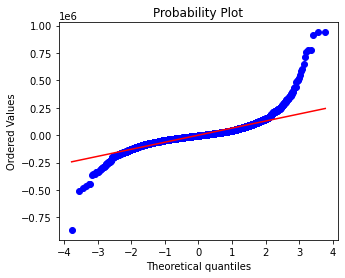

In [183]:
plt.figure(figsize=(5,4))
probplot(results4.resid, dist = 'norm', plot = plt)

In [195]:
X4_model = DecisionTreeRegressor(max_depth = 42).fit(X4,y_train)

29046    165000
15737    315000
54471    190000
34846    186000
4087     280000
          ...  
52686    307000
4166     272000
22574    160000
60333    173000
1425     251000
Name: totalyearlycompensation, Length: 8793, dtype: int64

In [196]:
x_test2 = x_test

['yearsofexperience',
 'Doctorate_Degree',
 'Race_Asian',
 'company_Apple',
 'company_Cisco',
 'company_Facebook',
 'company_Google',
 'company_IBM',
 'company_Intel',
 'company_Oracle',
 'level_10',
 'level_12',
 'level_3',
 'level_4',
 'level_6',
 'level_7',
 'level_8',
 'level_9',
 'level_Associate Offering Manager',
 'level_B10',
 'level_B9',
 'level_Band 10',
 'level_Band 6',
 'level_Band 7',
 'level_Band 8',
 'level_Band 9',
 'level_Band D',
 'level_Consulting MTS',
 'level_D1',
 'level_D2',
 'level_Director',
 'level_Director 1',
 'level_Distinguished Engineer',
 'level_E3',
 'level_E4',
 'level_E6',
 'level_E7',
 'level_E8',
 'level_E9',
 'level_Engineer',
 'level_Engineering Resident',
 'level_G10',
 'level_G11',
 'level_G12',
 'level_G13',
 'level_Grade 10',
 'level_Grade 11',
 'level_Grade 12',
 'level_Grade 13',
 'level_Grade 8',
 'level_Grade 9',
 'level_IC-1',
 'level_IC-2',
 'level_IC-3',
 'level_IC-5',
 'level_IC-6',
 'level_IC2',
 'level_IC3',
 'level_IC4',
 'level_IC5

## Usando a função *predict* ##
Com a regressão linear feita, utilizamos as features que restaram e criamos a variável x_test2 que recebe, a variável de teste, porém com as colunas restantes da regressão linear. Com isso, foi possível utilizar a função predict da *sklearn* para conseguirmos plotar um gráfico que segue a distribuição do nosso modelo, onde o eixo x é a 'totalyearlycompensation' e o eixo y, as outras variáveis.

In [197]:
X4_predict = X4_model.predict(x_test2)
plt.figure(figsize = (12,10))
sns.regplot(y_test,X4_predict,scatter_kws = {'s': 100})
plt.show()

Aqui foi conseguida a Acurácia do modelo, calculada pela biblioteca *sklearn*

C:\Users\Caio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


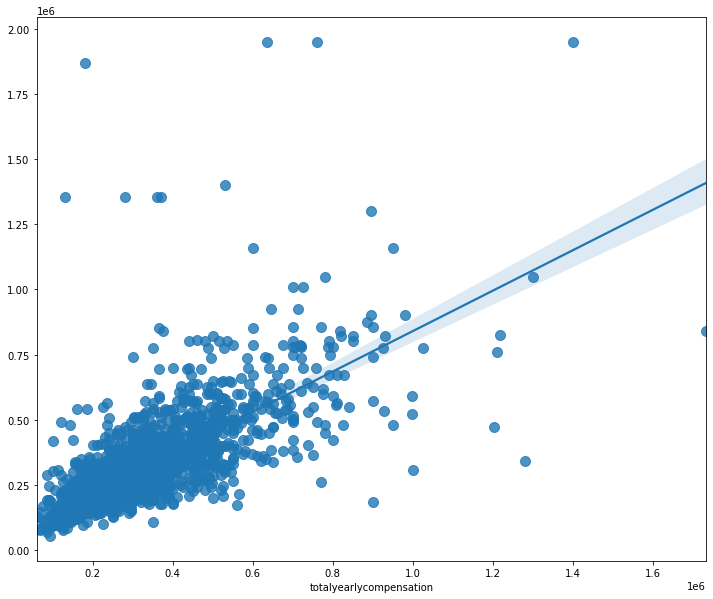

In [199]:
print(metrics.r2_score(y_test,X4_predict))

In [200]:
print(metrics.r2_score(y_test,X4_predict))

0.4821036442860238


# A Árvore em si #
Com a biblioteca *sklearn* conseguimos plotar a ávore de regressão, utilizando o modelo que foi criado acima na regressão linear, sendo ela capaz de nos ajudar na tomada de decisão a partir do nosso modelo.

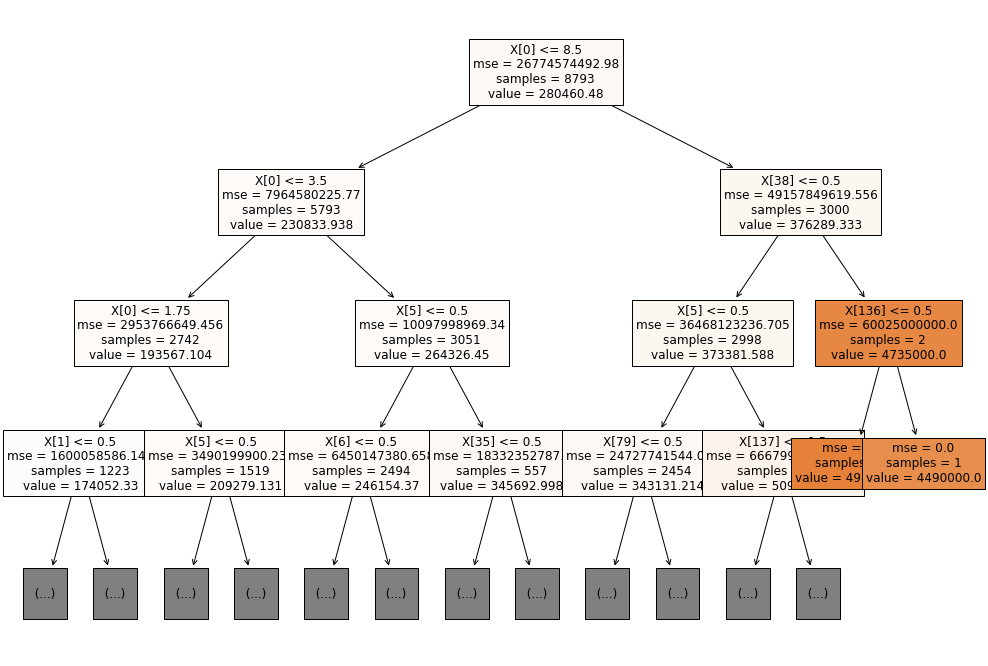

In [204]:
%matplotlib inline
plt.figure(figsize = (17,12))
tree.plot_tree(X4_model,fontsize = 12,filled = True,max_depth = 3);
